In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# create a model
class Model(nn.Module):
    #input layer (4 feats) -> hidden layer1 -> hidden layer2 -> output
    def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x


In [3]:
torch.manual_seed(41)

model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 1.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 2.0)

C:\Users\whitb\AppData\Local\Temp\ipykernel_1048\3724849456.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Versicolor', 2.0)


In [7]:
# train, test, and split
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [8]:
X = X.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [11]:
# Convert X features to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [12]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# set the criterion to measure error (how far off are predictions from data)
criterion = nn.CrossEntropyLoss()
# optmizer Adam, learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

c:\Users\whitb\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)

    # measure loss/error
    loss = criterion(y_pred, y_train)

    # keep track of losses through network
    losses.append(loss.detach().numpy())

    # print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and lass: {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 and lass: 1.1537690162658691
Epoch: 10 and lass: 1.0139992237091064
Epoch: 20 and lass: 0.7905964255332947
Epoch: 30 and lass: 0.5636057257652283
Epoch: 40 and lass: 0.4371228516101837
Epoch: 50 and lass: 0.32721033692359924
Epoch: 60 and lass: 0.2144642025232315
Epoch: 70 and lass: 0.12771326303482056
Epoch: 80 and lass: 0.08111429214477539
Epoch: 90 and lass: 0.05865471437573433


Text(0.5, 0, 'epoch')

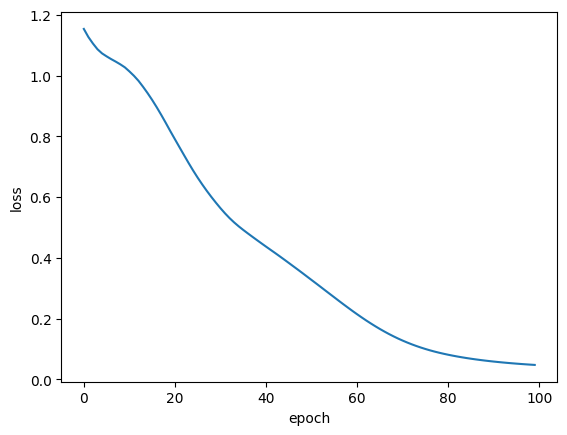

In [15]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epoch")

In [16]:
# Evaluate Model on Test set
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [17]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1} :  {str(y_val)} \t : {y_test[i]} \t : {y_val.argmax().item()}')

        # correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'correct: {correct}')

1 :  tensor([-8.2977,  4.9440,  2.0362]) 	 : 1 	 : 1
2 :  tensor([-11.1228,   8.0224,   1.5355]) 	 : 1 	 : 1
3 :  tensor([-11.7547,   7.9556,   2.0325]) 	 : 1 	 : 1
4 :  tensor([-4.1191, -0.2755,  3.2689]) 	 : 2 	 : 2
5 :  tensor([-9.6330,  5.9559,  2.1361]) 	 : 1 	 : 1
6 :  tensor([-1.9124, -2.8246,  3.5505]) 	 : 2 	 : 2
7 :  tensor([-7.2982,  3.5003,  2.4596]) 	 : 1 	 : 1
8 :  tensor([-3.5723, -0.9222,  3.3828]) 	 : 2 	 : 2
9 :  tensor([-8.3589,  4.6083,  2.3154]) 	 : 1 	 : 1
10 :  tensor([-11.6635,   8.3658,   1.6369]) 	 : 1 	 : 1
11 :  tensor([-6.8752,  3.0613,  2.5159]) 	 : 1 	 : 1
12 :  tensor([ 10.0004, -16.2693,   4.4366]) 	 : 0 	 : 0
13 :  tensor([  9.0933, -14.7592,   4.0385]) 	 : 0 	 : 0
14 :  tensor([-0.6550, -3.5495,  3.1421]) 	 : 2 	 : 2
15 :  tensor([  8.4703, -14.3809,   4.1923]) 	 : 0 	 : 0
16 :  tensor([-6.9061,  2.9803,  2.6347]) 	 : 1 	 : 1
17 :  tensor([  8.9617, -14.7575,   4.1113]) 	 : 0 	 : 0
18 :  tensor([-7.9202,  4.4080,  2.1979]) 	 : 2 	 : 1
19 :  tensor([ 1

In [18]:
# new data point, new iris ()
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [19]:
with torch.no_grad():
    print(model(new_iris))

tensor([  9.6524, -15.6925,   4.2835])


In [20]:
# save and load model
#===============================
torch.save(model.state_dict(), '../models/iris_model.pt')

In [21]:
new_model = Model()
new_model.load_state_dict(torch.load('../models/iris_model.pt'))

<All keys matched successfully>

In [22]:
# Make sure everything loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)